<a href="https://colab.research.google.com/github/vivianusdjpy/Nairobi-Hospital-test-for-hypothyroidism./blob/master/Nairobi_Hospital_test_for_hypothyroidism_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DECISION TREES AND SUPPORT VECTOR MACHINES:
Using Decision Trees and Support Vector Machines to Build a model that determines whether or not a patient's symptoms indicate that the patient has hypothyroid.

### a) Defining the Question

As a Data Scientist, I have been recruited to work for Hass Consulting Company which is a real estate leader with over 25 years of experience. I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

### b) Defining the Metric for Success
This project will be successful when:

1)We Identify the most crucial independent variables that affect house prices. 

2)The Regression model achieves atleast 80% accuracy

3)Have the lowest RMSE score possible


### c) Understanding the context 
HassConsult offers investment-grade developments all over the City. The developments have been conceptualized by their development team to be high quality assets using a data-driven approach in planning and design, that gears property for high rental returns and an escalated rate of capital growth.

### d)Experimental Design
The project was undertaken using the following design
Datasets(Independent Project Week 7 - house_data.csv)

Performing EDA

Feature Engineering

Multiple Linear Regression

Quantile regression

Ridge Regression

Lasso Regression

Elastic-Net Regression

Computing the RMSE

Plotting residual plots

Assess their heteroscedasticity using Barlette's test

Challenging the solution

Conclusion

### e) Data Relevance
The relavance of our data will be answered by the following questions.

How accurate is the data at predicting the Price of a house?

Was the dataset sufficient?

Was the data biased?

Is the data source a reliable source?

## 2. Importing the libraries

In [0]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the data

In [137]:
#loading the dataset
hypothyroid = pd.read_csv('/content/hypothyroid.csv')
hypothyroid.head(30)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n,?
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.70,y,1.30,y,54,y,0.86,y,63,n,?
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.90,y,34,y,1.05,y,32,n,?
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,?,y,39,y,1.21,y,32,n,?
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,?,y,7.60,y,1.02,y,7.50,n,?


In [138]:
import re

def toNumber(e):
    if type(e) != str:
        return 0
    if re.match("^-?\d+?\.\d+?$", 0):
        return float(0)
    if re.match("^-?\d+?$", 0):
        return int(0)
    return 0

someData = hypothyroid['age']
someData = [map(toNumber, list) for list in someData]
print(someData)

[<map object at 0x7fabe623cef0>, <map object at 0x7fabe63e2be0>, <map object at 0x7fabe8d65978>, <map object at 0x7fac00447c88>, <map object at 0x7fabe84251d0>, <map object at 0x7fabe8425518>, <map object at 0x7fabe8425128>, <map object at 0x7fabe8425470>, <map object at 0x7fabe8425400>, <map object at 0x7fabe84254a8>, <map object at 0x7fabe8425198>, <map object at 0x7fabe8d07048>, <map object at 0x7fabe8d07a58>, <map object at 0x7fabe8d073c8>, <map object at 0x7fabe8d07d30>, <map object at 0x7fabe8d07898>, <map object at 0x7fabe8d076a0>, <map object at 0x7fabe8d07d68>, <map object at 0x7fabe8d07390>, <map object at 0x7fabe8d071d0>, <map object at 0x7fabe8d076d8>, <map object at 0x7fabe84fc160>, <map object at 0x7fabe84fc0b8>, <map object at 0x7fabe84fc320>, <map object at 0x7fabe85099e8>, <map object at 0x7fabe8509978>, <map object at 0x7fabf81b4438>, <map object at 0x7fabe8703588>, <map object at 0x7fabe87034e0>, <map object at 0x7fabe87032b0>, <map object at 0x7fabe84a3ba8>, <map ob

In [139]:
#obtaining information about the dataset
hypothyroid.info()
#the data has 20 columns and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

In [140]:

hypothyroid.status.unique() #['hypothyroid', 'negative']
hypothyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


# Univariate Analysis

#Status column
This is the dependent variable which we are trying to predict.

The status column is binary where [ ' Hypothyroid ' ] indicates that the patient is sick

while [ ' negative ' ] indicates that the patient is healthy.

In [0]:
#describing the price column in the dataset using measures of central tendency and measures of dispersion
hypothyroid['status'].describe()

count         3163
unique           2
top       negative
freq          3012
Name: status, dtype: object

#Age
This column indicates the age of the patients

In [44]:
hypothyroid.age.value_counts()
#There are 446 '?' in the age column. The entries are too many to get dropped thus we replace the '?'
# with the mean age 

?     446
59     64
60     64
62     63
28     60
     ... 
97      1
90      1
7       1
93      1
5       1
Name: age, Length: 93, dtype: int64

In [80]:
#creating a copy
hypothyroid_1 = hypothyroid

#the function below turns all the '?' values to null values in the dataframe.
def create_null(X):
  a = list(X.columns)
  for i in a:
    X[i] = X[i].replace('?', np.nan)
    
create_null(hypothyroid_1)
hypothyroid_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          2717 non-null object
sex                          3090 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          2695 non-null object
T3_measured                  3163 non-null object
T3                           2468 non-null 

In [81]:
hypothyroid_1.age.nunique() 
#[93] There are 93 unique ages

92

In [82]:
hypothyroid_1.age.unique()
#The unique values are
#There is a question mark in the age column. We replace it with 0

array(['72', '15', '24', '77', '85', '64', '20', '42', '69', '75', '53',
       '59', '68', '50', '78', '65', '28', '43', '40', '84', nan, '83',
       '63', '73', '36', '27', '48', '71', '60', '34', '79', '62', '74',
       '32', '41', '70', '29', '5', '58', '35', '51', '22', '16', '44',
       '39', '47', '18', '17', '88', '56', '30', '45', '66', '52', '54',
       '80', '33', '38', '92', '67', '46', '13', '89', '61', '49', '26',
       '57', '31', '90', '81', '25', '37', '76', '87', '23', '55', '86',
       '98', '21', '97', '1', '6', '14', '82', '11', '19', '9', '12',
       '10', '8', '7', '4', '93'], dtype=object)

In [83]:
hypothyroid_1.age.isnull().sum()
#There are 446 null values in the dataframe thus we drop them.
#The values are too many(represent a sixth of the dataset) thus replacing the values with the 
#null values would introduce errors in modelling and making predictions.

446

In [84]:
hypothyroid_1.age.dropna()
hypothyroid1.age.describe()

count     2717
unique      92
top         59
freq        64
Name: age, dtype: object

In [0]:
hypothyroid_1[["age"]] = hypothyroid_1[["age"]].apply(pd.to_numeric)

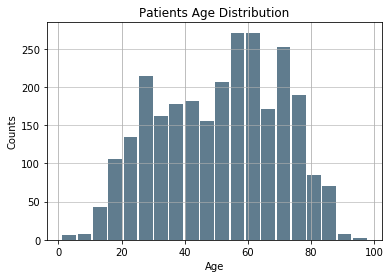

In [88]:
#visualizing age dirstibution
size, scale = 1000, 10
age = hypothyroid_1['age']

age.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

Text(0.5, 1.0, 'Boxplot of Bathrooms')

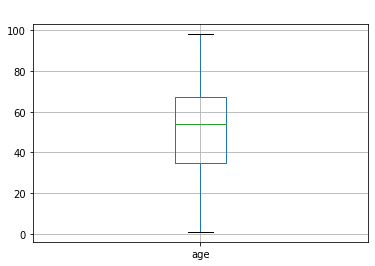

In [95]:
#checking for outliers using a boxplot
hypothyroid_1.boxplot(column=['age'])
plt.title("Boxplot of Bathrooms",fontsize=16,color="white")

,status,age,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,TSH_0,TSH_0.01,TSH_0.02,TSH_0.03,TSH_0.04,TSH_0.05,TSH_0.06,TSH_0.07,TSH_0.08,TSH_0.09,TSH_0.10,TSH_0.15,...,TBG_19,TBG_20,TBG_21,TBG_22,TBG_23,TBG_24,TBG_25,TBG_26,TBG_27,TBG_28,TBG_29,TBG_3.10,TBG_30,TBG_31,TBG_32,TBG_33,TBG_34,TBG_35,TBG_36,TBG_37,TBG_38,TBG_39,TBG_40,TBG_41,TBG_43,TBG_45,TBG_47,TBG_48,TBG_50,TBG_52,TBG_53,TBG_63,TBG_65,TBG_69,TBG_7.30,TBG_8.40,TBG_8.50,TBG_80,TBG_86,TBG_9.30
0,0,72.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,15.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,24.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,24.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,77.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Sex
This column gives the gender of the patients in the dataset

In [108]:
hypothyroid_1.sex.nunique()
#there are 30 unique values
hypothyroid_1.sex.describe()

count     3090
unique       2
top          F
freq      2182
Name: sex, dtype: object

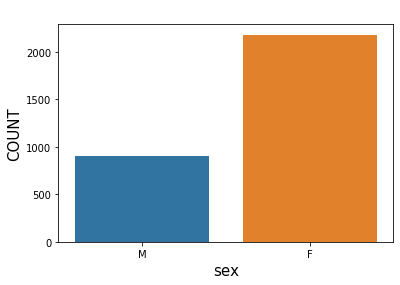

In [109]:
#visualizing the distribution of gender in the dataset
sb.countplot('sex',data = hypothyroid_1)
plt.xlabel("sex",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Gender",fontsize=16,color="white")
plt.show()
#The female entries are double that of male patients

# TBG Column

In [149]:
hypothyroid_1.TBG.describe()
#the TBG column has 260 values out of 2717.
#we drop this column since it has too many null values thus does not give meaningful information.


count     260
unique     52
top        28
freq       14
Name: TBG, dtype: object

In [0]:
#creating a copy and dropping the TBG column
hypothyroid_2 = hypothyroid_1.drop(['TBG'], axis =1)

# 7.Bivariate Analysis

## Checking for Multi-collinearity

In [0]:
# Let's display the correlations between the variables
corr = data4[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',	'waterfront',	'condition','grade','sqft_above','sqft_basement','yr_built',]].corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built
price,1.000000,0.315434,0.525144,0.702055,0.089658,0.256803,0.266332,0.036366,0.667476,0.605589,0.323833,0.053993
bedrooms,0.315434,1.000000,0.529159,0.591467,0.032807,0.181085,-0.006611,0.025478,0.366502,0.490600,0.309490,0.159167
bathrooms,0.525144,0.529159,1.000000,0.754663,0.087735,0.500645,0.063742,-0.124946,0.664979,0.685339,0.283789,0.506012
sqft_living,0.702055,0.591467,0.754663,1.000000,0.172822,0.353937,0.103816,-0.058704,0.762701,0.876597,0.435065,0.318037
sqft_lot,0.089658,0.032807,0.087735,0.172822,1.000000,-0.005210,0.021603,-0.008935,0.113616,0.183507,0.015293,0.053073
floors,0.256803,0.181085,0.500645,0.353937,-0.005210,1.000000,0.023695,-0.263706,0.458171,0.523866,-0.245684,0.489302
waterfront,0.266332,-0.006611,0.063742,0.103816,0.021603,0.023695,1.000000,0.016665,0.082773,0.072072,0.080591,-0.026165
condition,0.036366,0.025478,-0.124946,-0.058704,-0.008935,-0.263706,0.016665,1.000000,-0.144632,-0.158136,0.174057,-0.361380
grade,0.667476,0.366502,0.664979,0.762701,0.113616,0.458171,0.082773,-0.144632,1.000000,0.755919,0.168412,0.446952
sqft_above,0.605589,0.490600,0.685339,0.876597,0.183507,0.523866,0.072072,-0.158136,0.755919,1.000000,-0.051918,0.423879


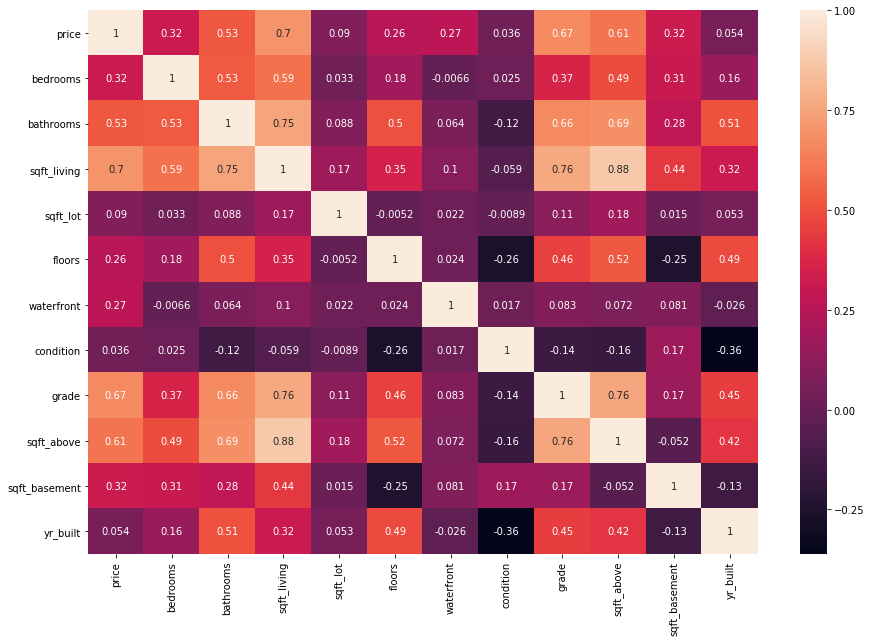

In [0]:
#visualizing correlation on a heatmap
plt.figure(figsize=(15,10))
sb.heatmap(corr, annot = True)
plt.show()

##### The heat map above shows VIF values that are very close to 0 meaning that there is very little multi-collinearity.

# Feature Engineering
The columns sqft_above and sqft_living have a very high correlation of 0.88 thus we join the two to form a new column sqft_abv_living

#Multi-Variate Analysis

In [0]:
#Finding the best principal Components
from sklearn.decomposition import PCA

np.random.seed(0)

train_features = X

model = PCA(n_components=5).fit(train_features)

# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = ['bedrooms','bathrooms','sqft_lot','floors','waterfront','condition','grade','sqft_basement','yr_built','zipcode','sqft_abv_living']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,sqft_lot
1,PC1,sqft_abv_living
2,PC2,sqft_basement
3,PC3,zipcode
4,PC4,yr_built
5,PC5,bedrooms
6,PC6,grade
7,PC7,condition
8,PC8,bathrooms
9,PC9,floors


#####The dataframe above gives an ordered list of how the principal components explain the variance starting from the highest explained variance to the lowest. PC0 explains the most variance while PC10 explains the least Variance.

In [116]:
#Ensuring that all data is the correct data type.
def create_null(X, columns):
  for i in columns:
    X[i] = pd.to_numeric(X[i], errors='coerce')
    
W = ['TT4', 'T3', 'T4U', 'TSH', 'age', 'FTI']
create_null(hypothyroid_1, W)
hypothyroid_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null int64
age                          2717 non-null float64
sex                          3090 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          2695 non-null float64
T3_measured                  3163 non-null object
T3                           2468 non-null

# Feature Engineering

In [128]:
# Import label encoder 
from sklearn import preprocessing 

#creating a copy
hypothyroid_2 = hypothyroid_1
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
hypothyroid_2['status']= label_encoder.fit_transform(hypothyroid_2['status']) 
  
hypothyroid_2['status'].unique()

#Feature engineering.
hypothyroid_2 = pd.get_dummies(hypothyroid_2)
hypothyroid_2.head()

,status,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,...,TBG_19,TBG_20,TBG_21,TBG_22,TBG_23,TBG_24,TBG_25,TBG_26,TBG_27,TBG_28,TBG_29,TBG_3.10,TBG_30,TBG_31,TBG_32,TBG_33,TBG_34,TBG_35,TBG_36,TBG_37,TBG_38,TBG_39,TBG_40,TBG_41,TBG_43,TBG_45,TBG_47,TBG_48,TBG_50,TBG_52,TBG_53,TBG_63,TBG_65,TBG_69,TBG_7.30,TBG_8.40,TBG_8.50,TBG_80,TBG_86,TBG_9.30
0,0,72.0,30.0,0.6,15.0,1.48,10.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,15.0,145.0,1.7,19.0,1.13,17.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,24.0,0.0,0.2,4.0,1.00,0.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,24.0,430.0,0.4,6.0,1.04,6.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,77.0,7.3,1.2,57.0,1.28,44.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Modelling


In [130]:
hypothyroid_2.head(5)

,status,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,...,TBG_19,TBG_20,TBG_21,TBG_22,TBG_23,TBG_24,TBG_25,TBG_26,TBG_27,TBG_28,TBG_29,TBG_3.10,TBG_30,TBG_31,TBG_32,TBG_33,TBG_34,TBG_35,TBG_36,TBG_37,TBG_38,TBG_39,TBG_40,TBG_41,TBG_43,TBG_45,TBG_47,TBG_48,TBG_50,TBG_52,TBG_53,TBG_63,TBG_65,TBG_69,TBG_7.30,TBG_8.40,TBG_8.50,TBG_80,TBG_86,TBG_9.30
0,0,72.0,30.0,0.6,15.0,1.48,10.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,15.0,145.0,1.7,19.0,1.13,17.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,24.0,0.0,0.2,4.0,1.00,0.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,24.0,430.0,0.4,6.0,1.04,6.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,77.0,7.3,1.2,57.0,1.28,44.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#1st Approach: Decision Trees

In [131]:
hypothyroid_2.info()
hypothyroid_2.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 95 columns):
status                         3163 non-null int64
age                            2717 non-null float64
TSH                            2695 non-null float64
T3                             2468 non-null float64
TT4                            2914 non-null float64
T4U                            2915 non-null float64
FTI                            2916 non-null float64
sex_F                          3163 non-null uint8
sex_M                          3163 non-null uint8
on_thyroxine_f                 3163 non-null uint8
on_thyroxine_t                 3163 non-null uint8
query_on_thyroxine_f           3163 non-null uint8
query_on_thyroxine_t           3163 non-null uint8
on_antithyroid_medication_f    3163 non-null uint8
on_antithyroid_medication_t    3163 non-null uint8
thyroid_surgery_f              3163 non-null uint8
thyroid_surgery_t              3163 non-null uint8
query_hypothyr

Index(['status', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_F', 'sex_M',
       'on_thyroxine_f', 'on_thyroxine_t', 'query_on_thyroxine_f',
       'query_on_thyroxine_t', 'on_antithyroid_medication_f',
       'on_antithyroid_medication_t', 'thyroid_surgery_f', 'thyroid_surgery_t',
       'query_hypothyroid_f', 'query_hypothyroid_t', 'query_hyperthyroid_f',
       'query_hyperthyroid_t', 'pregnant_f', 'pregnant_t', 'sick_f', 'sick_t',
       'tumor_f', 'tumor_t', 'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t',
       'TSH_measured_n', 'TSH_measured_y', 'T3_measured_n', 'T3_measured_y',
       'TT4_measured_n', 'TT4_measured_y', 'T4U_measured_n', 'T4U_measured_y',
       'FTI_measured_n', 'FTI_measured_y', 'TBG_measured_n', 'TBG_measured_y',
       'TBG_0', 'TBG_108', 'TBG_11', 'TBG_110', 'TBG_12', 'TBG_122', 'TBG_13',
       'TBG_14', 'TBG_15', 'TBG_16', 'TBG_17', 'TBG_18', 'TBG_19', 'TBG_20',
       'TBG_21', 'TBG_22', 'TBG_23', 'TBG_24', 'TBG_25', 'TBG_26', 'TBG_27',
       'TBG_

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
y = hypothyroid_2['status'].values
X = hypothyroid_2.drop(['status'], axis=1)

# Convert the data type for 'Class' column from object to category
#pd.get_dummies(hypothyroid, prefix=['sex'])

# Convert each value in the 'Type' column into a number. This will be our target column

# Train using 70% of the data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [133]:
# Create a decision tree classifier

tree = DecisionTreeRegressor()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

ValueError: ignored

In [123]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

NameError: ignored

# 2nd Approach: Support Vector Machines

In [134]:
from sklearn.svm import SVC
# Building the model 
polyclassifier = SVC(kernel='poly',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

ValueError: ignored

## 9. Follow up questions

### a). Did we have the right data?
NO!

### b). Do we need other data to answer our question?
YES! More conclusive features should be included.

#Conclusion

Linear Regression and Lasso Regression yield accurate models and can be used for prediction.